# Data Visualization: IS590

## Team 7 : Mongooses 
## Data Visualization for Others (Part 3)
### Abhiram Tripuraneni | Ankita Anil Jain | Aarthi Mahalakshmi Shankar | Arunprakash Nagarajan

## What are we trying to find out ?

** We are trying to find out the features that are influential to determine if a person earns  >50k or <=50k from the census data **

![alt text](../money.gif "Title")

# Data Overview

The dataset for this project originates from the UCI Machine Learning Repository. The dataset was donated by Ron Kohavi and Barry Becker. Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records were extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
Basic goal was a prediction task which is to determine whether a person makes over 50K a year. This sort of task can be common in a non-profit setting, where organizations survive on donations and also in advertising to target only a specific group of people to sell their products.


** Featureset Exploration **

As per the information from the dataset providers,

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Data Exploration

###  Importing Libraries

In [1]:
import numpy as np
from IPython.display import Image
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import sklearn.preprocessing as preprocessing
import seaborn as sns
import bqplot
import ipywidgets
%matplotlib inline
import plotly.plotly as py
from plotly.graph_objs import Bar
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
import matplotlib.pyplot as plt
import bokeh
import math
from bokeh.plotting import figure, output_file
from bokeh.io import show,output_notebook
from bokeh.palettes import Category20
from bokeh.models import ColumnDataSource
#from bokeh.transform import factor_cmap
from bokeh.models import FuncTickFormatter
%matplotlib inline
import pandas as pd
import plotly.graph_objs as go
#import holoviews as hv
#import colorcet as cc
from plotly.graph_objs import Scatter, Figure, Layout

### Importing the Dataset

In [2]:
dataset = pd.read_csv('census.csv')

In [3]:
dataset.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
n_records = dataset.shape[0]
n_greater_50k = dataset[dataset['income']=='>50K'].shape[0]
n_at_most_50k = dataset[dataset['income']=='<=50K'].shape[0]
greater_percent = (n_greater_50k/n_records)*100

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2F}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [5]:
upper = dataset[dataset['income']=='>50K']
middle = dataset[dataset['income']=='<=50K']

In [6]:
# The different columns and their data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


### Visualisation to differentiate the population earning '>50k' and '<=50k'

#### Only 24.78% of the population considered are earning more than 50k

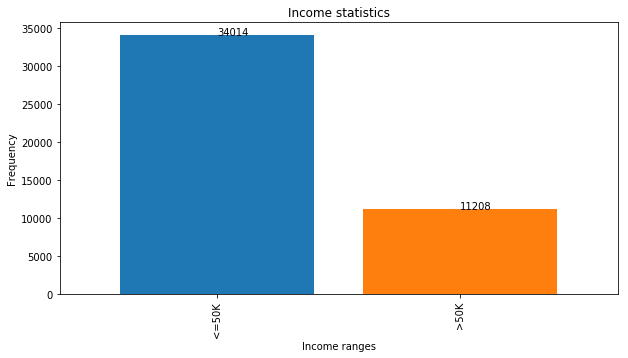

In [7]:
#income plot
fig, ax = plt.subplots(figsize=(10, 5))
count = dataset['income'].value_counts()
ax=count.plot.bar(width=.8) 
ax.set_title("Income statistics")
ax.set_xlabel("Income ranges")
ax.set_ylabel("Frequency")

for i, v in count.reset_index().iterrows():
    ax.text(i, v.income + 0.2 , v.income, color='black')
    

## So, what is the occupation of this population?

![alt text](../occupation.gif "Title")

#### Occupation distribution of the population earning more than 50K USD

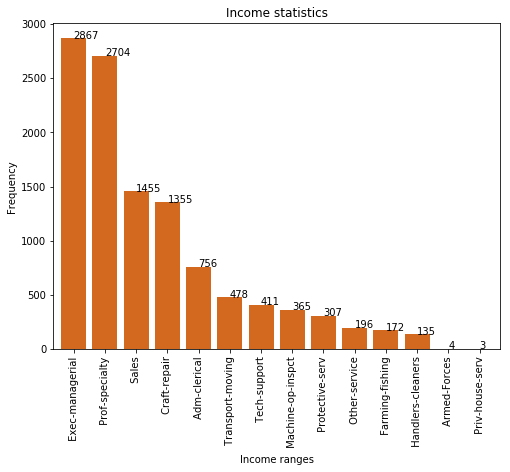

In [8]:
#test_five = dataset[dataset['income']=='>50K']
fig, axes = plt.subplots(figsize=(8, 6))
count = upper['occupation'].value_counts()
axes.set_title("Income statistics")
axes.set_xlabel("Income ranges")
axes.set_ylabel("Frequency")
axes=count.plot.bar(width=.8,color = 'chocolate')

for i, v in count.reset_index().iterrows():
    axes.text(i, v.occupation + 0.2 , v.occupation, color='black')

#### Occupation distribution of the population earning atmost 50K USD

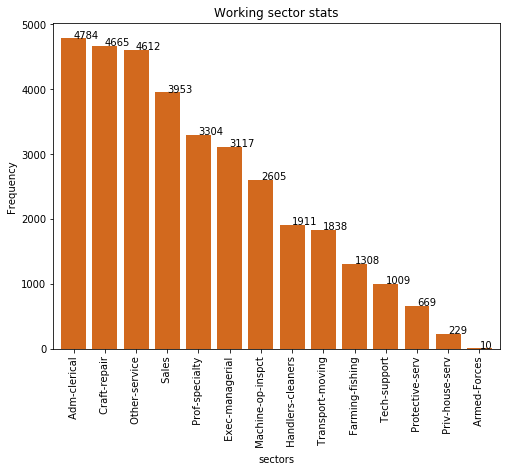

In [9]:
#test_five = dataset[dataset['income']=='>50K']
fig, axes = plt.subplots(figsize=(8, 6))
count = middle['occupation'].value_counts()
axes.set_title("Working sector stats")
axes.set_xlabel("sectors")
axes.set_ylabel("Frequency")
axes=count.plot.bar(width=.8,color = 'chocolate')

for i, v in count.reset_index().iterrows():
    axes.text(i, v.occupation + 0.2 , v.occupation, color='black')

#### From the above plots the population earning atmost 50k are majorly into clerical jobs, where as the population earning more than 50K are into managerial and sales jobs.

## The sectors in which the population are working in :

#### Working sectors of population with income greater than 50K USD

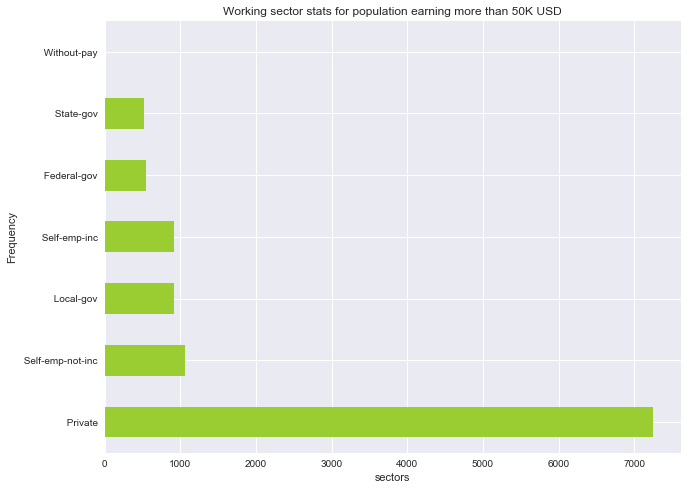

In [31]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([1,1,1,1])
axes.set_title("Working sector stats for population earning more than 50K USD")
axes.set_xlabel("sectors")
axes.set_ylabel("Frequency")
upper['workclass'].value_counts().plot(kind="barh", color = 'yellowgreen')

#### Working sectors of population with income less than 50K USD

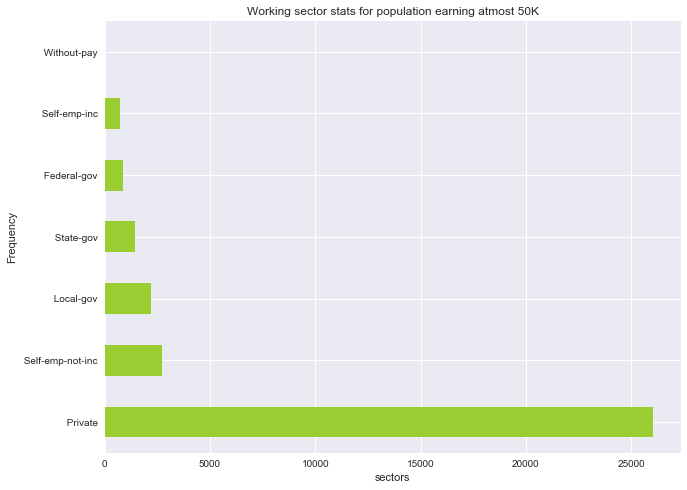

In [32]:
fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([1,1,1,1])
axes.set_title("Working sector stats for population earning atmost 50K")
axes.set_xlabel("sectors")
axes.set_ylabel("Frequency")
middle['workclass'].value_counts().plot(kind="barh", color = 'yellowgreen')

#### From the plots, we can observe that in both the groups majority of the population works in private sector

## How many hours per week do the population from two groups work for?

#### working hours of the population that earn atmost 50K USD and greater than 50K USD

Text(0.5,1,'Working hours/Week for population earning income >50k')

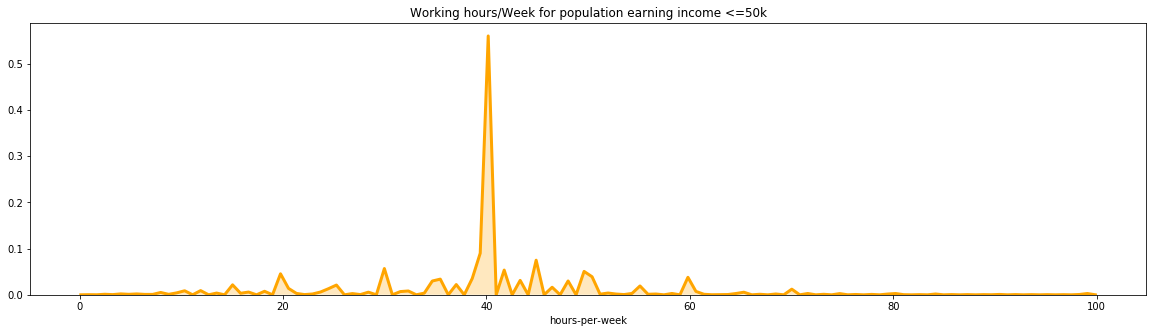

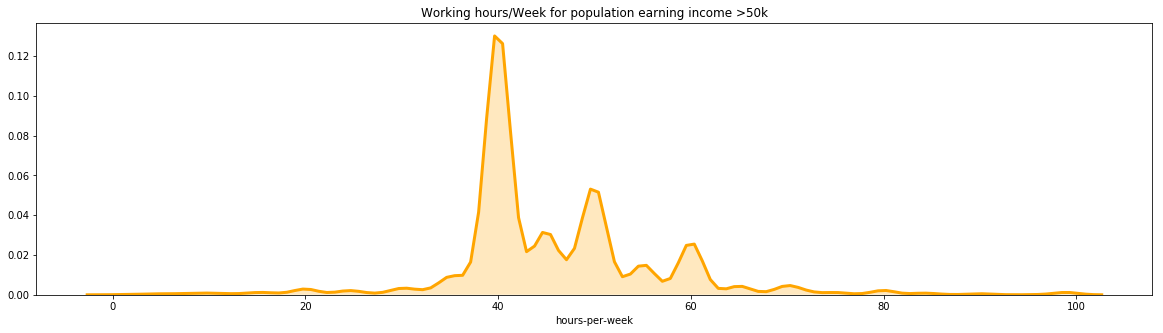

In [12]:
fig, ax1 = plt.subplots(nrows=1, sharey=True, figsize=(20, 5))
fig1, ax2 = plt.subplots(nrows=1, sharey=True, figsize=(20, 5))
sns.distplot(middle['hours-per-week'], hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 3}, color = 'orange', ax=ax1)
ax1.set_title("Working hours/Week for population earning income <=50k")
sns.distplot(upper['hours-per-week'], hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 3}, color = 'orange', ax= ax2)
ax2.set_title("Working hours/Week for population earning income >50k")

#### Majority of the population who earn atmost 50K USD work between 35-40 hours a week, whereas majority of population who earn more than 50K USD work between 40-60 hours a week.

![alt text](../workboy.gif "Title")

## So what are the educational qualifications of the population?

In [13]:
y_range = [i for i in dataset["education_level"].value_counts()]
x_range = ["HS-grad","Some-college","Bachelors","Masters","Assoc-voc","11th","Assoc-acdm","10th"
         ,"7th-8th","Prof-school","9th","12th","Doctorate","5th-6th","1st-4th","Preschool"]

source = ColumnDataSource(data=dict(education_level=x_range, counts=y_range, color=Category20[16]))
p = figure(x_range=x_range,y_range=(0,15000) ,plot_height=250, title="Education_level")
p.vbar(x='education_level', top='counts',width=0.9, color='color',source=source)
p.legend.orientation = "horizontal"
p.legend.location = "top_right"
p.xaxis.axis_label = "education_level"
p.yaxis.axis_label = "Counts"
show(p)

### Education number for population earning >50k and <=50k

In [14]:
pd.unique(dataset[['education_level','education-num']].values.ravel())

array([' Bachelors', 13.0, ' HS-grad', 9.0, ' 11th', 7.0, ' Masters', 14.0,
       ' 9th', 5.0, ' Some-college', 10.0, ' Assoc-acdm', 12.0, ' 7th-8th',
       4.0, ' Doctorate', 16.0, ' Assoc-voc', 11.0, ' Prof-school', 15.0,
       ' 5th-6th', 3.0, ' 10th', 6.0, ' Preschool', 1.0, ' 12th', 8.0,
       ' 1st-4th', 2.0], dtype=object)

| Education_level | education-num |
| :---: | :---: | 
| Bachelors| 13.0 |
| HS-grad | 9.0 |
| 11th | 7.0 |
| Masters | 14.0 |
| 9th | 5.0 |
| Some-college | 10.0 |
| Assoc-acdm | 12.0 |
| 7th-8th | 4.0 |
| Doctorate | 16.0 |
| Assoc-voc | 11.0 |
| Prof-school | 15.0 |
| 5th-6th | 3.0 |
| 10th | 6.0 |
| Preschool | 1.0 |
| 12th | 8.0 |
| 1st-4th | 2.0 |



Text(0.5,0.98,'Education number for population earning <=50k')

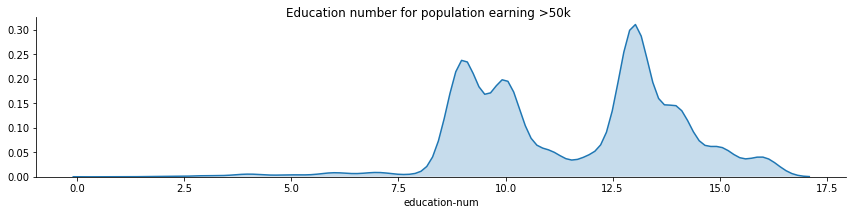

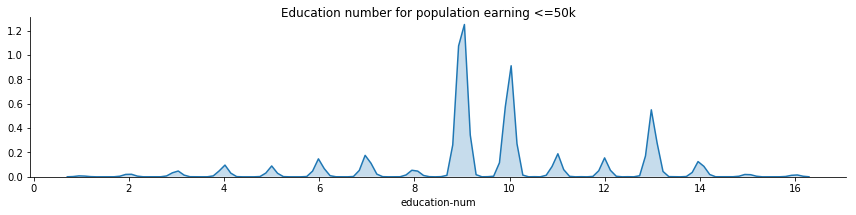

In [15]:
first = sns.FacetGrid(upper, hue='income', aspect=4).map(sns.kdeplot, 'education-num', shade=True)
first.fig.suptitle('Education number for population earning >50k')
second = sns.FacetGrid(middle, hue='income', aspect=4).map(sns.kdeplot, 'education-num', shade=True)
second.fig.suptitle('Education number for population earning <=50k')

#### Population earning more than 50K USD have educational degrees of Bachelor's and above, whereas population earning atmost 50K USD have educational degrees of High School and some college

### Breakdown of the counts of people earning above or below 50K based on their education levels and sex.

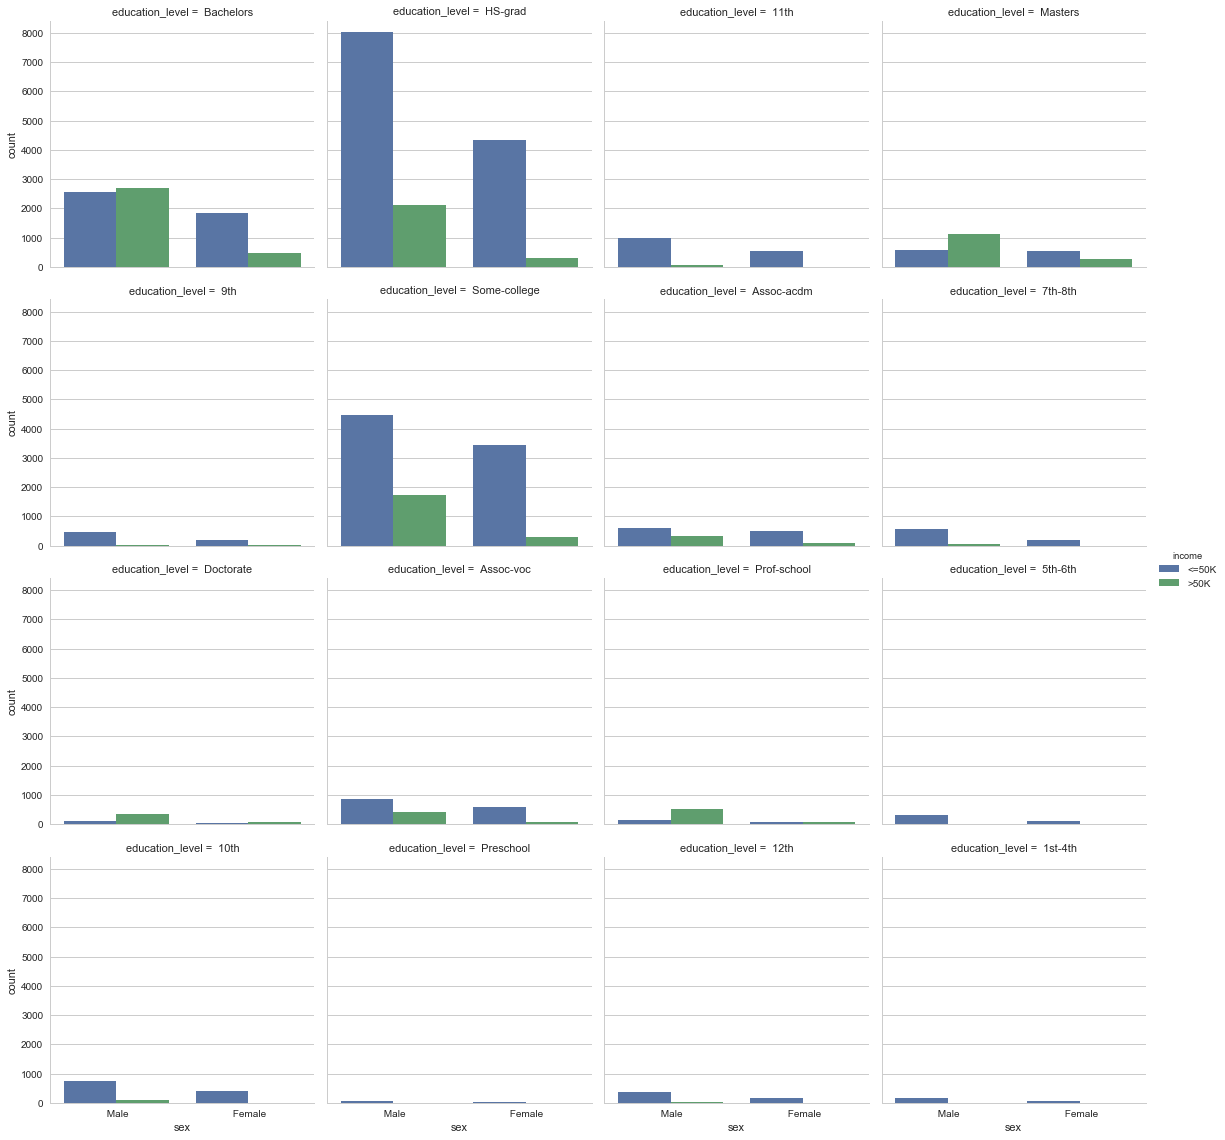

In [16]:
sns.set(style="whitegrid", color_codes=True)
newfig = sns.factorplot("sex", col='education_level', data=dataset, hue='income', kind="count", col_wrap=4);

## What are the other factors which influence the income of the population?

### 1. Factors : Age and Workclass

** Sector and age of people who earn greater than 50,000 USD and people who earn less than 50,000 USD per year **

<Figure size 1008x576 with 0 Axes>

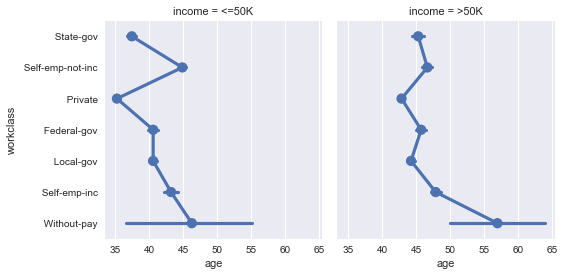

<Figure size 432x288 with 0 Axes>

In [17]:
fig = plt.figure(figsize=(14,8))
sns.set_style("darkgrid")
sns.factorplot(data=dataset, x="age", y="workclass",col='income')
plt.tight_layout()
plt.show()
plt.subplots_adjust(hspace=1.0, wspace=2.0)

#### Population earning atmost 50K USD who work in private sectors are younger than majority of population working in private sector who are earning more than 50K USD. More experience,  Greater Income.

### 2. Factors : Age and Hours-per-week

#### Interactive plot which shows the relationship between age and hours per week for the population who earn greater than 50K USD and atmost 50K USD.

In [18]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = 'hours-per-week')
y_ax = bqplot.Axis(scale = y_sc, label = 'age',
                  orientation = 'vertical')

tt = bqplot.Tooltip(fields = ["x","y"])

scatters = bqplot.Scatter(x = upper['hours-per-week'][:100],
                          y = upper['age'][:100],
                          scales = {'x': x_sc, 'y': y_sc},
                          sizes = 0.5,
                         tooltip = tt)
ls = bqplot.interacts.LassoSelector(scales = {'x': x_sc, 'y': y_sc},
                                   marks = [scatters])

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax], title = 'population earning greater than 50K USD',
                   interaction = None)
label = ipywidgets.Label()
display(fig, label);
# When we hover over the points in the plot below it shows the exact X and Y values for proper understanding of the plot

Figure(axes=[Axis(label='hours-per-week', scale=LinearScale()), Axis(label='age', orientation='vertical', scal…

Label(value='')

In [19]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

x_ax = bqplot.Axis(scale = x_sc, label = 'hours-per-week')
y_ax = bqplot.Axis(scale = y_sc, label = 'age',
                  orientation = 'vertical')

tt = bqplot.Tooltip(fields = ["x","y"])

scatters = bqplot.Scatter(x = middle['hours-per-week'][:100],
                          y = middle['age'][:100],
                          scales = {'x': x_sc, 'y': y_sc},
                          sizes = 0.5, 
                         tooltip = tt)
ls = bqplot.interacts.LassoSelector(scales = {'x': x_sc, 'y': y_sc},
                                   marks = [scatters])

fig = bqplot.Figure(marks = [scatters], axes = [x_ax, y_ax], title = 'population earning atmost 50K USD',
                   interaction = None)
label = ipywidgets.Label()
display(fig, label);
# When we hover over the points in the plot below it shows the exact X and Y values for proper understanding of the plot

Figure(axes=[Axis(label='hours-per-week', scale=LinearScale()), Axis(label='age', orientation='vertical', scal…

Label(value='')

#### From the above plots people earning at most 50K USD work lesser than the population earning more than 50K USD. Even younger people from the first group work lesser than 40 hours compared to the population from the other group.

## 3. Factors: Race and Income

** Interactive plot which depicts the relation between races of the people and their income.
We can select individual race on the legend which higlights the statistics about that particular race. Hover over the bins to get a count of population in particular races **

** Note: This plot opens up in a new window as html page **

In [20]:
pv = pd.pivot_table(dataset, index=['income'], columns=["race"], values=['education-num'], aggfunc=lambda x:len(x), fill_value=0)

#Title and axes labels

trace1 = go.Bar(x=pv.index, y=pv[('education-num',' Amer-Indian-Eskimo')], name='Amer-Indian-Eskimo')
trace2 = go.Bar(x=pv.index, y=pv[('education-num',' Asian-Pac-Islander')], name='Asian-Pac-Islander')
trace3 = go.Bar(x=pv.index, y=pv[('education-num',' Black')], name='Black')
trace4 = go.Bar(x=pv.index, y=pv[('education-num',' Other')], name='Other')
trace5 = go.Bar(x=pv.index, y=pv[('education-num',' White')], name='White')

app = dash.Dash()

data=[trace1, trace2, trace3, trace4,trace5]

layout = go.Layout(
    title='Income vs Count of people from various Race',
    xaxis=dict(
        title='Income',
    ),
    yaxis=dict(
        title='Count of people',
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig = go.Figure(data=data, layout=layout)
plot(fig, filename='Race_Income.html')

'file:///Users/aarthi/Downloads/data viz/Race_Income.html'

## Interactive plot between Income and eight other features.

#### Select the feature from the drop down list of factors to get a plot against income for the population.

Dropdown(description='select feature', options=('age', 'workclass', 'education_level', 'education-num', 'marit…

Button(description='Make graph', style=ButtonStyle())

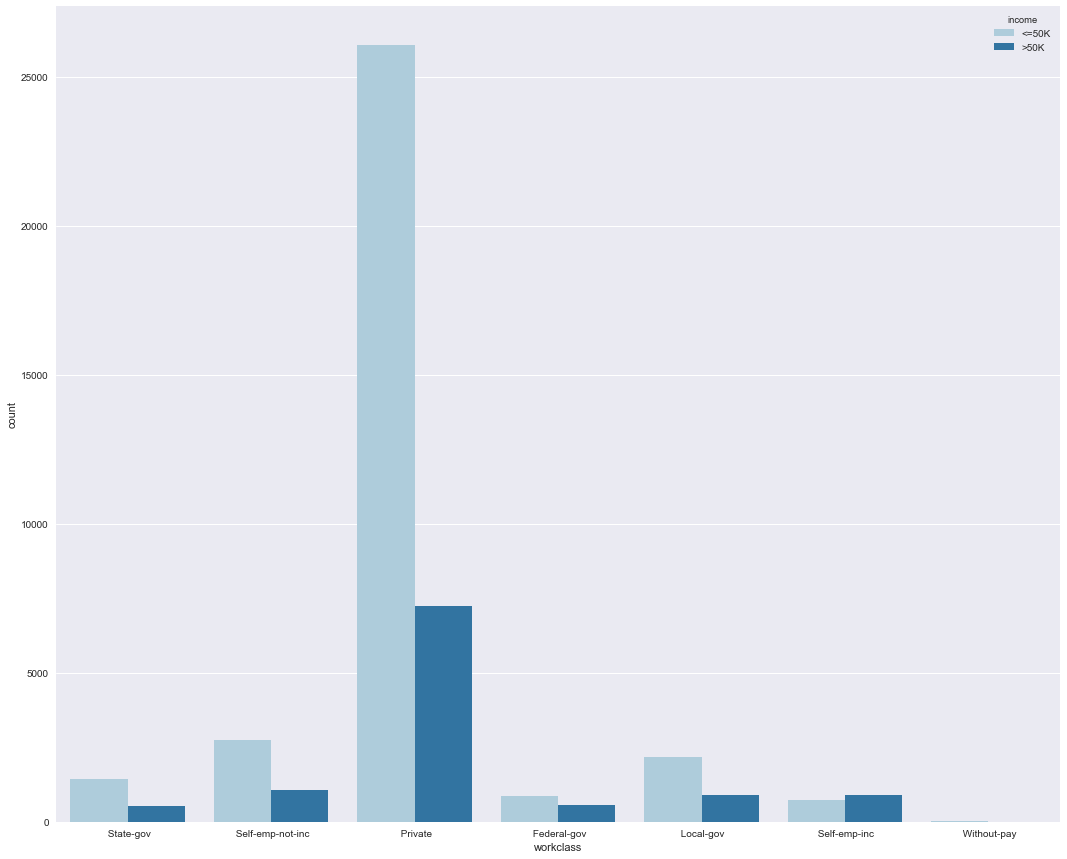

In [21]:
# each column vs the Income range
import seaborn as sns
%matplotlib inline

from ipywidgets import widgets
from IPython.display import display

columns = dataset[['age','workclass','education_level','education-num','marital-status','occupation','relationship','race','sex']]

selection = widgets.Dropdown(description = "select feature")
selection.options = columns
display(selection)

def on_button_clicked(b):
    fig = plt.figure(figsize=(18,15))
    sns.countplot(selection.value, data= dataset, hue='income', palette="Paired")
    plt.show()
    

button = widgets.Button(description = "Make graph")
display(button)

button.on_click(on_button_clicked)

#Reset

## From the visualisation, the below features do not seem to affect income

### 1. Marital Status 

** Observation: People who have income of atmost 50,000 USD and greater than 50,000 USD and their marital status with respect to their ages **

Text(0.5,1,'Population earning atmost 50k USD')

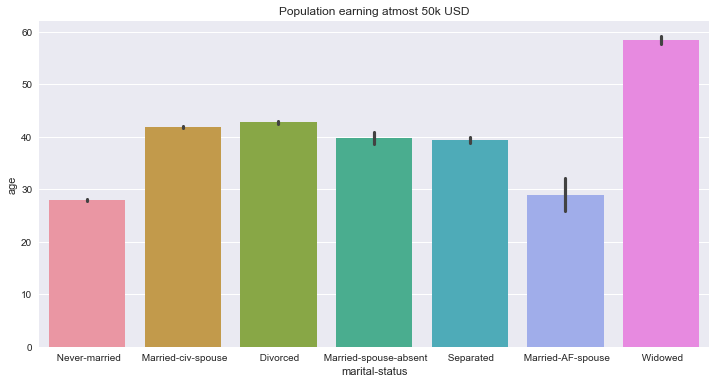

In [22]:
test = dataset[dataset['income']=='<=50K']
fig = plt.figure(figsize=(12,6))
ax = sns.barplot(x = test["marital-status"], y = test["age"])
sns.set(rc={'figure.figsize':(12.7,29.27)})
ax.set_title('Population earning atmost 50k USD')

Text(0.5,1,'Population earning greater than 50k USD')

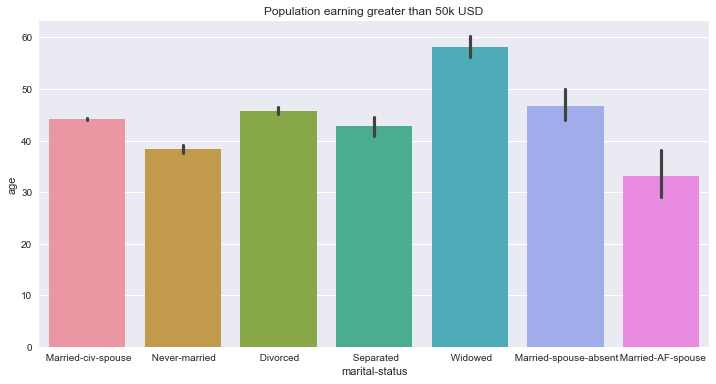

In [23]:
test = dataset[dataset['income']=='>50K']
fig = plt.figure(figsize=(12,6))
ax = sns.barplot(x = test["marital-status"], y = test["age"] )
sns.set(rc={'figure.figsize':(12.7,29.27)})
ax.set_title('Population earning greater than 50k USD')

### 2. Capital-Gain

** Observation: capital gains of people who have income greater than 50,000 USD **

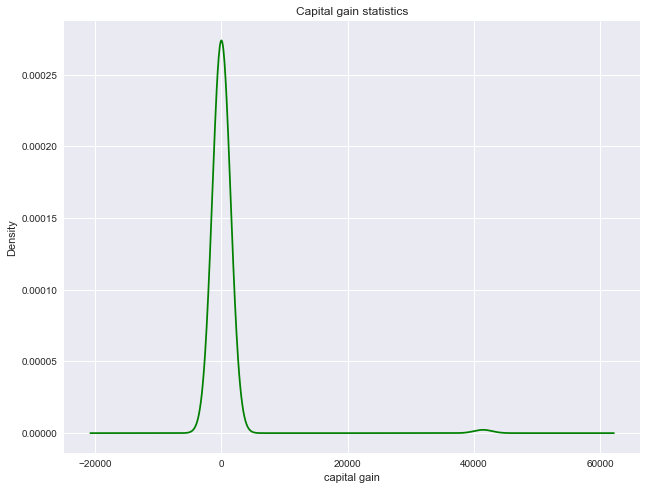

In [30]:
test_three = dataset['income']
fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([1,1,1,1])
axes.set_title("Capital gain statistics")
axes.set_xlabel("capital gain")
axes.set_ylabel("Frequency")
dataset['capital-gain'].value_counts().plot(kind="kde", color = 'green')

### Correlation between all the features of the dataset

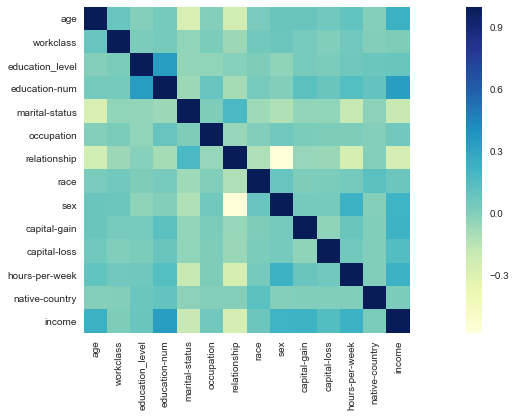

In [25]:
# Encode the categorical features as numbers
def number_encode_features(dataset):
   result = dataset.copy()
   encoders = {}
   for column in result.columns:
       if result.dtypes[column] == np.object:
           encoders[column] = preprocessing.LabelEncoder()
           result[column] = encoders[column].fit_transform(result[column])
   return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(dataset)
fig=plt.figure(figsize=(20,6))
sns.heatmap(encoded_data.corr(), square=True, cmap="YlGnBu")
plt.show()

## Count of Population with respect to their Native-Country (excluding United States) having income >50k and <=50k

### As most of the population is from United States we have not considered it, as it acts as an outlier.

![alt text](../world_cut.gif "Title")

In [26]:
cc = pd.read_csv("2014_world_gdp_with_codes.csv", dtype='unicode')

data = [ dict(
      type = 'choropleth',
      locations = cc['CODE'],
      z = cc['GREATER_COUNT'],
      text = cc['COUNTRY'],
      colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
          [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
      autocolorscale = False,
      reversescale = True,
      marker = dict(
          line = dict (
              color = 'rgb(180,180,180)',
              width = 0.5
          ) ),
      colorbar = dict(
          title = 'count'),
    ) ]



layout = dict(
  title = 'Count of Population with respect to their Native-Country (excluding United States) having income >50k',
  geo = dict(
      showframe = True,
      showcoastlines = True,
      projection = dict(
          type = 'Mercator'
      )
  )
)

figure = go.Figure(data=data, layout=layout)
plot(figure, validate=False, filename="Greater_than_50K.html")
iplot(figure)

In [27]:
data = [ dict(
      type = 'choropleth',
      locations = cc['CODE'],
      z = cc['LESSER_COUNT'],
      text = cc['COUNTRY'],
      colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
          [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
      autocolorscale = False,
      reversescale = True,
      marker = dict(
          line = dict (
              color = 'rgb(180,180,180)',
              width = 0.5
          ) ),
      colorbar = dict(
          title = 'count'),
    ) ]



layout = dict(
  title = 'Count of Population with respect to their Native-Country (excluding United States) having income <=50k',
  geo = dict(
      showframe = True,
      showcoastlines = True,
      projection = dict(
          type = 'Mercator'
      )
  )
)

figure = go.Figure(data=data, layout=layout)
plot(figure, validate=False, filename="atmost_50K.html") 
iplot(figure) 